## [Core Operations](https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_table_of_contents_core/py_table_of_contents_core.html#py-table-of-content-core)

In [94]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

x=np.uint8([250])
y=np.uint8([10])
x+y,cv2.add(x,y)

(array([4], dtype=uint8), array([[255]], dtype=uint8))

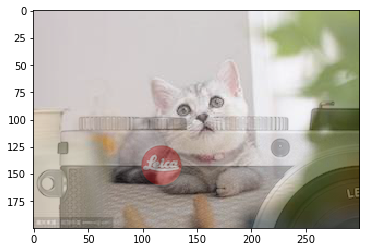

In [95]:
def show_color(img):
    tmp=np.apply_along_axis(lambda x:x[::-1],2,img)
    plt.subplots()
    plt.imshow(tmp)
    plt.show()

def show_gray(img):
    plt.subplot()
    plt.imshow(img)
    plt.gray()
    plt.show()

#Image Blending
cat=cv2.imread('cat.jpg')
leica=cv2.imread('leica.jpg')[:cat.shape[0],:cat.shape[1],:]
dst=cv2.addWeighted(cat,0.7,leica,0.3,0)
show_color(dst)

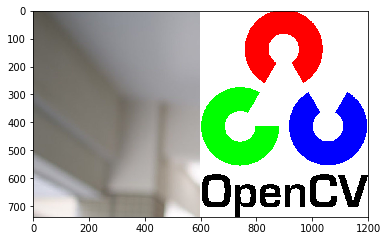

In [96]:
#Bitwise Operation( AND, OR, NOT and XOR operations)
#They will be highly useful while extracting any part of the image (as we will see in coming chapters), 
#defining and working with non-rectangular ROI etc.

#操作说明：将opencv_logo放在cat上面

logo=cv2.imread('opencv_logo.png')
classroom=cv2.imread('classroom.jpg')

#创建roi(感兴趣区域)
rows,cols,channels=logo.shape
roi=classroom[:rows,:cols]
show_color(np.hstack((roi,logo)))

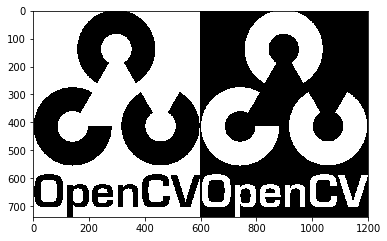

In [97]:

#创建蒙版与反相蒙版
logo_gray=cv2.cvtColor(logo,cv2.COLOR_BGR2GRAY)

"""
cat_bg=cv2.bitwise_and(roi,roi,mask=mask_inv)

error: /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:241:
error: (-215) (mtype == 0 || mtype == 1) && _mask.sameSize(*psrc1) in function binary_op

此操作需要保持roi、mask长宽一致，
本来的情况是roi(200, 114, 3) mask (207, 114)
所以此处将生成mask的logo_gray减小7pixel
"""

#cv2.threshold参数说明：
#src,阈值,超过阈值的数据替换值，阈值方法
ret,mask=cv2.threshold(logo_gray,150,255,cv2.THRESH_BINARY)


mask_inv=cv2.bitwise_not(mask)
show_gray(np.hstack((mask,mask_inv)))

![opencv图像二值化样例](https://img-blog.csdn.net/20150709085751112)

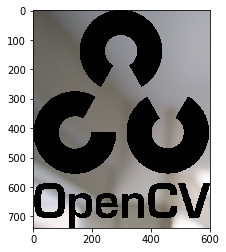

In [98]:
# Now black-out the area of logo in ROI
# 给roi添加蒙版mask_inv
classroom_bg=cv2.bitwise_and(roi,roi,mask=mask)
show_color(classroom_bg)

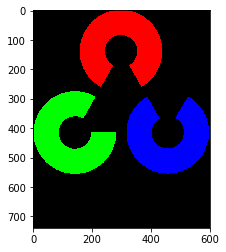

(739, 600, 3)

In [99]:
# Take only region of logo from logo image.
#给logo添加蒙版mask
logo_fg=cv2.bitwise_and(logo,logo,mask=mask_inv)
show_color(logo_fg)
logo_fg.shape

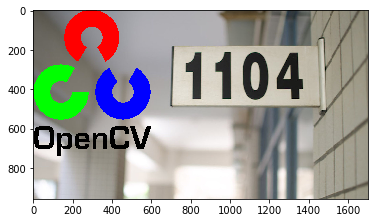

In [100]:
# Put logo in ROI and modify the main image
dst=cv2.add(classroom_bg,logo_fg)
classroom[:rows,:cols]=dst
show_color(classroom)